# Herramientas Computacionales - Resumen
## Secciones 1, 3 y 6
### Sección 1: Miércoles 6:30 am - 8:00 am
### Sección 3: Martes 8:00 am - 9:30 am
### Sección 6: Lunes 2:00 pm - 3:30 pm

In [148]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


ImportError: No module named seaborn

In [158]:
exams = pd.read_csv('./exams_points.csv')
final = pd.read_csv('./final_grades.csv')

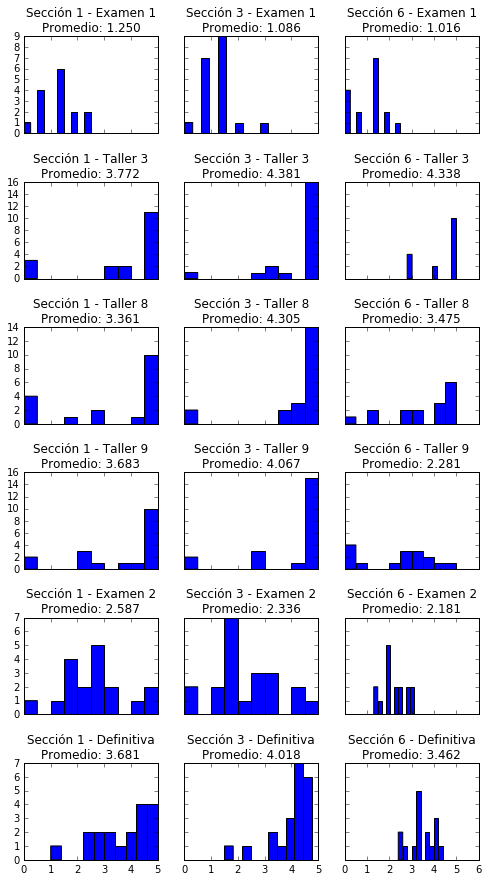

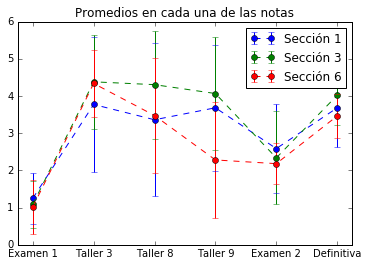

In [159]:
final_s1 = final.loc[final.sec==1]
final_s3 = final.loc[final.sec==3]
final_s6 = final.loc[final.sec==6]

ave_s1 = []
std_s1 = []
ave_s3 = []
std_s3 = []
ave_s6 = []
std_s6 = []

final_names = ['e1', 't3', 't8', 't9', 'e2', 'def']
Final_names = ['Examen 1', 'Taller 3', 'Taller 8', 'Taller 9', 'Examen 2', 'Definitiva']
fig, ax = plt.subplots(len(final_names),3,figsize = (7,12), sharex = 'col', sharey = 'row')
plt.tight_layout()
for i in range(len(final_names)):
    final_names[i]
    arr_1 = final_s1[final_names[i]].as_matrix()
    arr_1 = arr_1[~np.isnan(arr_1)]
    arr_3 = final_s3[final_names[i]].as_matrix()
    arr_3 = arr_3[~np.isnan(arr_3)]
    arr_6 = final_s6[final_names[i]].as_matrix()
    arr_6 = arr_6[~np.isnan(arr_6)]
    
    ave_s1.append(np.mean(final_s1[final_names[i]]))
    std_s1.append(np.std(final_s1[final_names[i]]))
    ave_s3.append(np.mean(final_s3[final_names[i]]))
    std_s3.append(np.std(final_s3[final_names[i]]))
    ave_s6.append(np.mean(final_s6[final_names[i]]))
    std_s6.append(np.std(final_s6[final_names[i]]))
    fig.subplots_adjust(hspace=.5)
    ax[i,0].set_title('Sección 1 - '+Final_names[i]+'\nPromedio: %.3f'% ave_s1[i])
    ax[i,0].hist(arr_1)
    ax[i,1].hist(arr_3)
    ax[i,1].set_title('Sección 3 - '+Final_names[i]+'\nPromedio: %.3f'% ave_s3[i])
    ax[i,2].hist(arr_6)
    ax[i,2].set_title('Sección 6 - '+Final_names[i]+'\nPromedio: %.3f'% ave_s6[i])
    
plt.show()  
plt.close()
plt.title('Promedios en cada una de las notas')
plt.errorbar([0,1,2,3,4,5], ave_s1, yerr=std_s1, fmt='--o', label = 'Sección 1')
plt.errorbar([0,1,2,3,4,5], ave_s3, yerr=std_s3, fmt='--o', label = 'Sección 3')
plt.errorbar([0,1,2,3,4,5], ave_s6, yerr=std_s6, fmt='--o', label = 'Sección 6')
plt.xticks([0,1,2,3,4,5], Final_names)
plt.legend()
plt.xlim([-0.25,5.25])
plt.show()
plt.close()

## Comparación entre los exámenes

Los temas de las preguntas son:

1. Linux
2. Linux
3. Listas
4. If
5. Funciones/print
6. For
7. Arreglos de numpy
8. matplotlib

Hay que tener presente que este semestre el diagnóstico y el final tenían preguntas distintas, a pesar de ser del mismo tema.

En la gráfica al final se comparan el número total de aciertos de las dos secciones en la respectiva pregunta en el exámen diagnóstico y en el final.

In [160]:
x = np.arange(1,9)
exam1 = exams.loc[exams.exam == 1]
exam2 = exams.loc[exams.exam == 2]

y1 = []
y2 = []

for i in range(8):
    d1 = exam1['pt'+str(i+1)].as_matrix()
    d1 = d1[~np.isnan(d1)]
    d2 = exam2['pt'+str(i+1)].as_matrix()
    d2 = d2[~np.isnan(d2)]
    y1.append(sum(d1))
    y2.append(sum(d2))

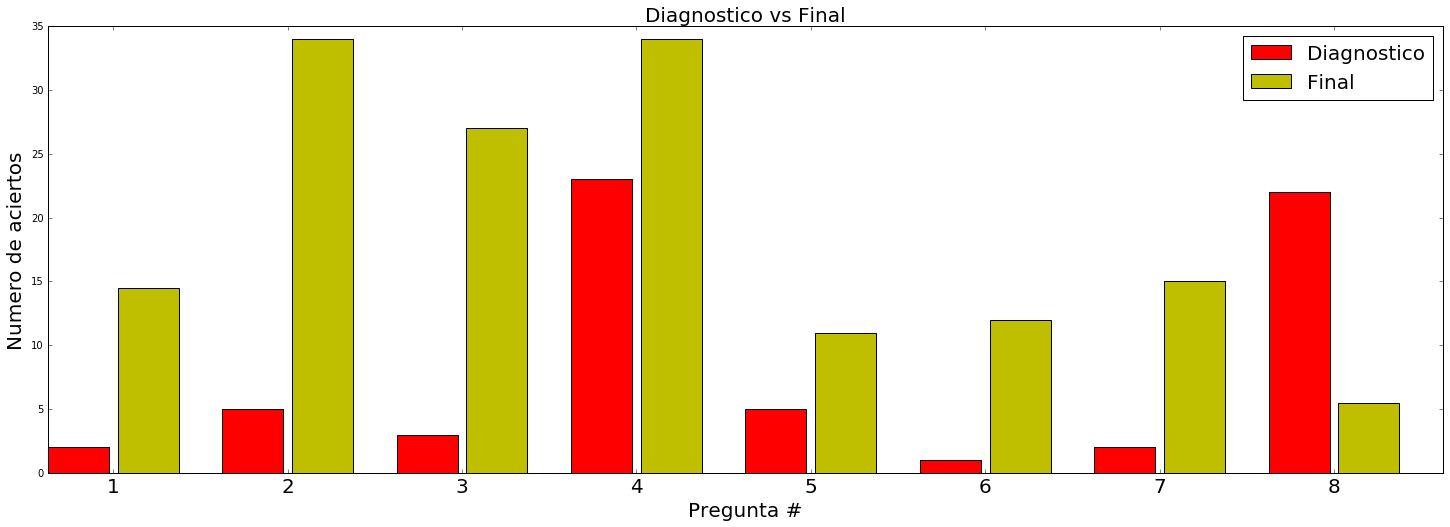

In [163]:
N = 8
men_means = y1


ind = x  # the x locations for the groups
width = 0.35      # the width of the bars
separation = 0.05

fig, ax = plt.subplots(figsize = (25,8) )
rects1 = ax.bar(ind, men_means, width, color='r')

women_means = y2
rects2 = ax.bar(ind + width + separation, women_means, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Numero de aciertos', fontsize = 20)
ax.set_title('Diagnostico vs Final', fontsize = 20)
ax.set_xticks(ind + width + separation / 2)
ax.set_xticklabels(np.arange(1,51), fontsize = 20)
#ax.set_yticklabels([0,5,10,15,20,25,30,35,40,45,50,55], fontsize=15)
#ax.set_yticklabels([0,10,20,30,40,50,60], fontsize=15)
ax.set_xlabel('Pregunta #', fontsize = 20)
ax.legend((rects1[0], rects2[0]), ('Diagnostico', 'Final'), fontsize=20)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=15)

    autolabel(rects1)
    autolabel(rects2)

    plt.savefig('number.png')
    plt.show()

    return df_n